In [1]:
import pandas as pd

filepath = "../../data/pfex_2004-2024_processed.csv"
local_df = pd.read_csv(filepath)

print(local_df.head())

  FishCode                   FishDesc  Consigned   Sold  LowPrice  AvgPrice  \
0     CADM               Cod | market        NaN   5259      2.06      3.13   
1     HDDP          Haddock | snapper        NaN    474      0.98      1.68   
2     CADS                Cod | scrod        NaN     72      1.21      1.78   
3     FADS  Halibut, Atlantic | 10-50        NaN     39     13.01     13.01   
4     HDDL            Haddock | large        NaN  12909      1.88      2.32   

   HighPrice  MonthNum  YearNum FishGroup  
0       4.77         1     2023       Cod  
1       2.00         1     2023   Haddock  
2       2.73         1     2023       Cod  
3      13.01         1     2023   Halibut  
4       2.89         1     2023   Haddock  


In [2]:
filepath = "../../data/noaa_2006-2024.csv"
imports_df = pd.read_csv(filepath)

print(imports_df.head())

   year  month  hts_number                                               name  \
0  2007      6   305510000                          GROUNDFISH COD NSPF DRIED   
1  2007      4   304292011  GROUNDFISH COD ATLANTIC FILLET BLOCKS FROZEN >...   
2  2007      1   305510000                          GROUNDFISH COD NSPF DRIED   
3  2007      4   305510000                          GROUNDFISH COD NSPF DRIED   
4  2007     11   305306030  GROUNDFISH COD NSPF FILLET DRIED/SALTED/BRINE ...   

  fus_group_code1  fus_group_code2               fus_group1 fus_group2  \
0              K1             3012       CURED, DRIED, FISH        COD   
1              C3              314  F/F, BLOCKS, GROUNDFISH        COD   
2              K1             3012       CURED, DRIED, FISH        COD   
3              K1             3012       CURED, DRIED, FISH        COD   
4              K2             4007     CURED, PICKLED, FISH        COD   

   cntry_code cntry_name  ... custom_district_name  edible_code  kil

In [3]:
# Filter the dataframe to remove rows where 'FishGroup' is 'Halibut', 'Yellowtail', or 'OTHER'
local_df = local_df[~local_df['FishGroup'].isin(['Halibut', 'Yellowtail', 'OTHER'])]

print(local_df['FishGroup'].unique())

['Cod' 'Haddock' 'Hake' 'Pollock' 'Redfish']


In [4]:
# Convert 'Sold' from pounds to kilos
local_df['Sold'] = local_df['Sold'] / 2.20462

# Convert prices from $/lb to $/kilo
price_columns = ['LowPrice', 'AvgPrice', 'HighPrice']
for column in price_columns:
    local_df[column] = local_df[column] * 2.20462

local_df['Country'] = 'USA'

print(local_df.columns.unique())


Index(['FishCode', 'FishDesc', 'Consigned', 'Sold', 'LowPrice', 'AvgPrice',
       'HighPrice', 'MonthNum', 'YearNum', 'FishGroup', 'Country'],
      dtype='object')


In [5]:
print(imports_df.columns.unique())


Index(['year', 'month', 'hts_number', 'name', 'fus_group_code1',
       'fus_group_code2', 'fus_group1', 'fus_group2', 'cntry_code',
       'cntry_name', 'continent', 'fao', 'custom_district_code',
       'custom_district_name', 'edible_code', 'kilos', 'val', 'source',
       'association', 'rfmo', 'nmfs_region_code', 'links', 'date'],
      dtype='object')


In [6]:
local_df = local_df[['Sold', 'AvgPrice', 'YearNum', 'MonthNum', 'FishGroup', 'Country']]

In [7]:
imports_df = imports_df[['kilos', 'val', 'year', 'month', 'fus_group1', 'fus_group2', 'cntry_name']]


In [8]:
imports_df.loc[:, 'Price'] = imports_df['val'] / imports_df['kilos']

In [9]:
print(imports_df['fus_group2'].unique())

['COD' 'CUSK, HADDOCK' 'POLLOCK' 'HADDOCK' 'UNCLASSIFIED'
 'COD, CUSK, HADDOCK, HAKE, POLLOCK' 'OCEAN PERCH' 'OTHER' 'CUSK'
 'BLUE WHITING' 'GROUNDFISH' 'HAKE, WHITING' 'SURIMI' 'HAKE']


In [10]:
def map_fish_group(value):
    value = value.lower()  # Convert the string to lowercase for consistent comparison
    if 'cod' in value:
        return 'Cod'
    elif 'haddock' in value:
        return 'Haddock'
    elif 'pollock' in value:
        return 'Pollock'
    elif 'hake' in value or 'whiting' in value:  # 'whiting' maps to 'hake'
        return 'Hake'
    elif 'perch' in value:  # 'perch' maps to 'redfish'
        return 'Redfish'
    else:
        return 'Other'  # Assign 'Other' if none of the conditions above are met

# Apply the mapping function to the 'fus_group2' column to create the new 'FishGroup' column
imports_df['FishGroup'] = imports_df['fus_group2'].apply(map_fish_group)

# Filter out the rows where 'FishGroup' is 'Other'
imports_df = imports_df[imports_df['FishGroup'] != 'Other']

print(imports_df['FishGroup'].unique())


['Cod' 'Haddock' 'Pollock' 'Redfish' 'Hake']


In [11]:
print(imports_df['fus_group1'].unique())

['CURED, DRIED, FISH' 'F/F, BLOCKS, GROUNDFISH' 'CURED, PICKLED, FISH'
 'F/F, FILLET/STEAK, GROUNDFISH' 'F/F, MEAT, GROUNDFISH'
 'F/F, WHOLE, GROUNDFISH' 'CURED, SMOKED/KIPPERED, FISH']


In [12]:
# Keep only the rows where 'fus_group1' contains 'F/F'
# imports_df = imports_df[imports_df['fus_group1'].str.contains('F/F')]

In [13]:
imports_df.rename(columns={
    'kilos': 'Sold',
    'Price': 'AvgPrice',
    'year': 'YearNum',
    'month': 'MonthNum',
    'cntry_name': 'Country'
}, inplace=True)


In [14]:
imports_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 0 to 2570
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sold        2398 non-null   int64  
 1   val         2398 non-null   int64  
 2   YearNum     2398 non-null   int64  
 3   MonthNum    2398 non-null   int64  
 4   fus_group1  2398 non-null   object 
 5   fus_group2  2398 non-null   object 
 6   Country     2398 non-null   object 
 7   AvgPrice    2398 non-null   float64
 8   FishGroup   2398 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 187.3+ KB


In [15]:
local_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3259 entries, 0 to 4045
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sold       3259 non-null   float64
 1   AvgPrice   3259 non-null   float64
 2   YearNum    3259 non-null   int64  
 3   MonthNum   3259 non-null   int64  
 4   FishGroup  3259 non-null   object 
 5   Country    3259 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 178.2+ KB


In [16]:
imports_df['Sold'] = imports_df['Sold'].astype(float)

columns_to_keep = ['Sold', 'AvgPrice', 'YearNum', 'MonthNum', 'FishGroup', 'Country']

local_df = local_df[columns_to_keep]
imports_df = imports_df[columns_to_keep]

# Concatenate the dataframes
combined_df = pd.concat([local_df, imports_df], ignore_index=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sold       5657 non-null   float64
 1   AvgPrice   5657 non-null   float64
 2   YearNum    5657 non-null   int64  
 3   MonthNum   5657 non-null   int64  
 4   FishGroup  5657 non-null   object 
 5   Country    5657 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 265.3+ KB


In [17]:
print(combined_df.head(5))

          Sold  AvgPrice  YearNum  MonthNum FishGroup Country
0  2385.445111  6.900461     2023         1       Cod     USA
1   215.003039  3.703762     2023         1   Haddock     USA
2    32.658689  3.924224     2023         1       Cod     USA
3  5855.430868  5.114718     2023         1   Haddock     USA
4  1518.629061  5.555642     2023         1      Hake     USA


In [ ]:
filepath = "data/combined_data.csv"
combined_df.to_csv(filepath, index=False) 
print(f'Combined data saved at: {filepath}')

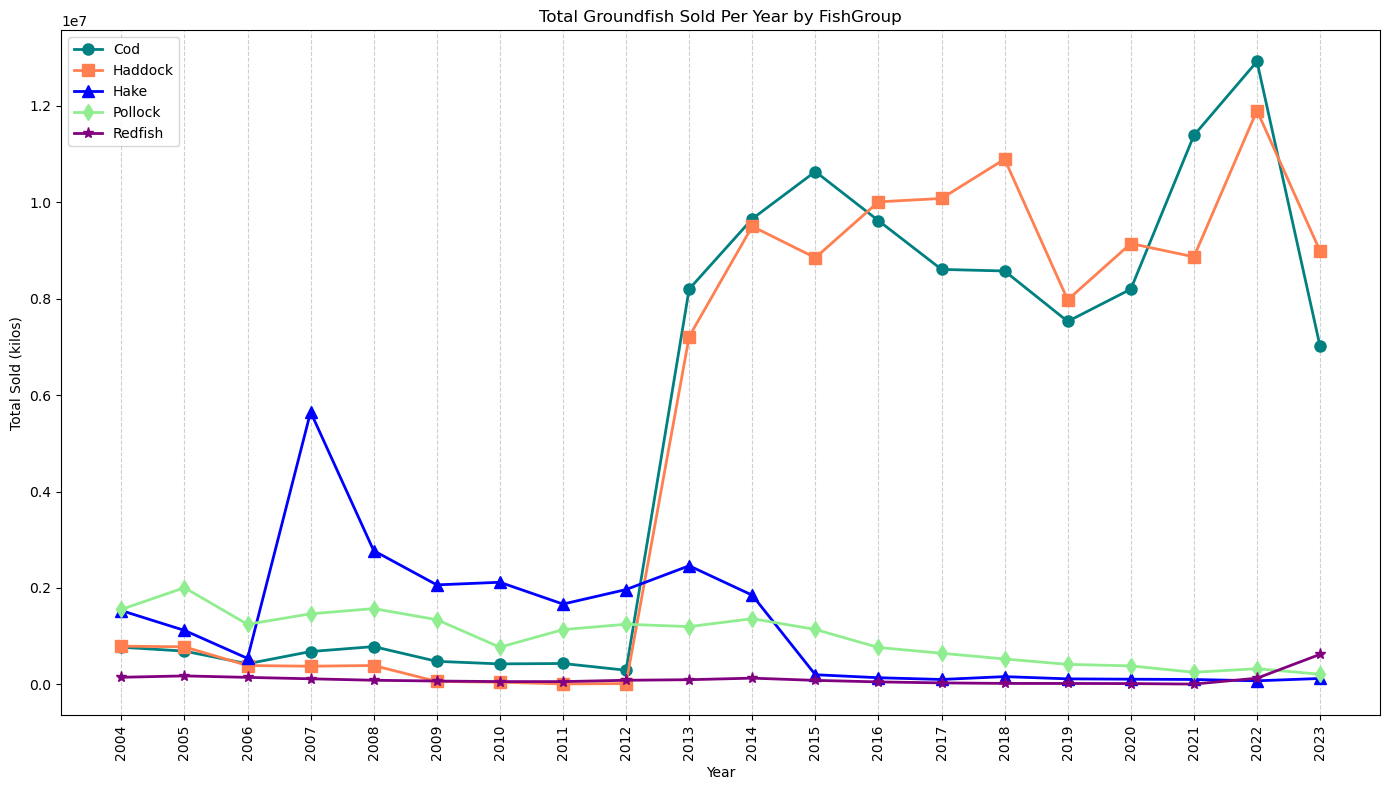

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to filter the DataFrame by FishGroup and calculate total sold per year
def total_sold_per_year_by_fishgroup(fishgroup):
    combined_df_filtered = combined_df[combined_df['FishGroup'] == fishgroup]
    total_sold_per_year = combined_df_filtered.groupby('YearNum')['Sold'].sum().reset_index()
    return total_sold_per_year

# Specified FishGroups
specified_groups = ['Cod', 'Haddock', 'Hake', 'Pollock', 'Redfish']

# Get total sold per year for each specified FishGroup
totals_per_group = {group: total_sold_per_year_by_fishgroup(group) for group in specified_groups}

# Plotting
plt.figure(figsize=(14, 8))

# Determine the range of years present in your data for a more dynamic x-axis
year_min = combined_df['YearNum'].min()
year_max = combined_df['YearNum'].max()
years_range = np.arange(year_min, year_max + 1)  # Adjusted to fit the dataset

# Colors and markers for visual distinction
colors = ['teal', 'coral', 'blue', 'lightgreen', 'purple']
markers = ['o', 's', '^', 'd', '*']

for group, color, marker in zip(specified_groups, colors, markers):
    # Extract year and sold data for the group
    years = totals_per_group[group]['YearNum']
    sold = totals_per_group[group]['Sold']

    # Plotting each group with a line and markers
    plt.plot(years, sold, label=group, color=color, marker=marker, linestyle='-', linewidth=2, markersize=8)

plt.xticks(years_range, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Sold (kilos)')
plt.title('Total Groundfish Sold Per Year by FishGroup')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.legend()
plt.tight_layout()
plt.show()
